In [2]:
import pandas as pd

filepath_dict = {'yelp':   'data/sentiment_analysis/yelp_labelled.txt',
                 'amazon': 'data/sentiment_analysis/amazon_cells_labelled.txt',
                 'imdb':   'data/sentiment_analysis/imdb_labelled.txt'}

df_list = []
for source, filepath in filepath_dict.items():
    df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')
    df['source'] = source  # Add another column filled with the source name
    df_list.append(df)

df = pd.concat(df_list)
print(df.iloc[0])

sentence    Wow... Loved this place.
label                              1
source                          yelp
Name: 0, dtype: object


In [3]:
sentences = ['John likes ice cream', 'John hates chocolate.']

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(sentences)
vectorizer.vocabulary_

{'John': 0, 'likes': 5, 'ice': 4, 'cream': 2, 'hates': 3, 'chocolate': 1}

In [5]:
vectorizer.transform(sentences).toarray()

array([[1, 0, 1, 0, 1, 1],
       [1, 1, 0, 1, 0, 0]], dtype=int64)

In [6]:
from sklearn.model_selection import train_test_split

df_yelp = df[df['source'] == 'yelp']

sentences = df_yelp['sentence'].values
y = df_yelp['label'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(
    sentences, y, test_size=0.25, random_state=1000)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
X_train

<750x1714 sparse matrix of type '<class 'numpy.int64'>'
	with 7368 stored elements in Compressed Sparse Row format>

In [8]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.796


In [9]:
for source in df['source'].unique():
    df_source = df[df['source'] == source]
    sentences = df_source['sentence'].values
    y = df_source['label'].values

    sentences_train, sentences_test, y_train, y_test = train_test_split(
        sentences, y, test_size=0.25, random_state=1000)

    vectorizer = CountVectorizer()
    vectorizer.fit(sentences_train)
    X_train = vectorizer.transform(sentences_train)
    X_test  = vectorizer.transform(sentences_test)

    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)
    score = classifier.score(X_test, y_test)
    print('Accuracy for {} data: {:.4f}'.format(source, score))

Accuracy for yelp data: 0.7960
Accuracy for amazon data: 0.7960
Accuracy for imdb data: 0.7487


In [10]:
from keras.models import Sequential
from keras import layers

input_dim = X_train.shape[1]  # Number of features
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
model.compile(loss='binary_crossentropy', 
               optimizer='adam', 
               metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                25060     
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 25,071
Trainable params: 25,071
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(X_train, y_train,
                     epochs=100,
                     verbose=True,
                     validation_data=(X_test, y_test),
                     batch_size=10)

Epoch 1/100
57/57 [==============================] - 0s 3ms/step - loss: 2.2703e-05 - accuracy: 1.0000 - val_loss: 1.5236 - val_accuracy: 0.7647
Epoch 2/100
57/57 [==============================] - 0s 3ms/step - loss: 2.1960e-05 - accuracy: 1.0000 - val_loss: 1.5260 - val_accuracy: 0.7647
Epoch 3/100
57/57 [==============================] - 0s 4ms/step - loss: 2.1327e-05 - accuracy: 1.0000 - val_loss: 1.5292 - val_accuracy: 0.7647
Epoch 4/100
57/57 [==============================] - 0s 3ms/step - loss: 2.0685e-05 - accuracy: 1.0000 - val_loss: 1.5298 - val_accuracy: 0.7647
Epoch 5/100
57/57 [==============================] - 0s 3ms/step - loss: 2.0022e-05 - accuracy: 1.0000 - val_loss: 1.5374 - val_accuracy: 0.7647
Epoch 6/100
57/57 [==============================] - 0s 3ms/step - loss: 1.9387e-05 - accuracy: 1.0000 - val_loss: 1.5466 - val_accuracy: 0.7647
Epoch 7/100
57/57 [==============================] - 0s 3ms/step - loss: 1.8782e-05 - accuracy: 1.0000 - val_loss: 1.5492 - val_ac

57/57 [==============================] - 0s 3ms/step - loss: 3.9343e-06 - accuracy: 1.0000 - val_loss: 1.7551 - val_accuracy: 0.7594
Epoch 58/100
57/57 [==============================] - 0s 3ms/step - loss: 3.8204e-06 - accuracy: 1.0000 - val_loss: 1.7539 - val_accuracy: 0.7594
Epoch 59/100
57/57 [==============================] - 0s 3ms/step - loss: 3.7075e-06 - accuracy: 1.0000 - val_loss: 1.7597 - val_accuracy: 0.7594
Epoch 60/100
57/57 [==============================] - 0s 3ms/step - loss: 3.5770e-06 - accuracy: 1.0000 - val_loss: 1.7616 - val_accuracy: 0.7594
Epoch 61/100
57/57 [==============================] - 0s 3ms/step - loss: 3.4654e-06 - accuracy: 1.0000 - val_loss: 1.7655 - val_accuracy: 0.7594
Epoch 62/100
57/57 [==============================] - 0s 3ms/step - loss: 3.3658e-06 - accuracy: 1.0000 - val_loss: 1.7666 - val_accuracy: 0.7594
Epoch 63/100
57/57 [==============================] - 0s 3ms/step - loss: 3.2650e-06 - accuracy: 1.0000 - val_loss: 1.7654 - val_accuracy

In [22]:
from keras.backend import clear_session
clear_session()

In [23]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.7594


In [28]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

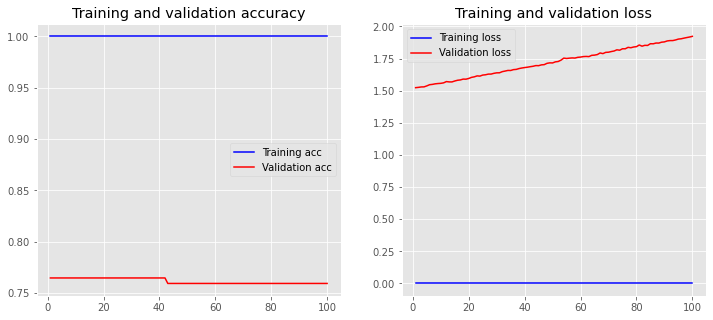

In [29]:
plot_history(history)